<a href="https://colab.research.google.com/github/minhaz1172/Heart_Diesease_Prediction-ML-/blob/main/CardioVascular_Disease_Prediction(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# upload file from Pc

In [1]:
import pandas as pd

# Upload the file
from google.colab import files
uploaded = files.upload()


Saving cardio_train.csv to cardio_train.csv


# import liabraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load  the dataset

In [3]:
df = pd.read_csv('cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# check the null values

In [4]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Standardization data

In [22]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [23]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,-0.436062,2,0.443452,-0.847873,-0.122182,-0.088238,1,1,0,0,1,0
1,1,0.307686,1,-1.018168,0.749831,0.072610,-0.035180,3,1,0,0,1,1
2,2,-0.247997,1,0.078047,-0.708942,0.007679,-0.141297,3,1,0,0,0,1
3,3,-0.748152,2,0.565254,0.541435,0.137541,0.017879,1,1,0,0,1,1
4,4,-0.808543,1,-1.018168,-1.264666,-0.187113,-0.194356,1,1,0,0,0,0


In [6]:
df.shape

(70000, 13)

# value count of Cardio(dependent) Column

In [24]:
df['cardio'].value_counts()

,count
cardio,
0,35021
1,34979


# drop unnecessary columns

In [45]:
df=df.drop('id', axis=1)

# Visulalize the dataset

<Axes: xlabel='cardio', ylabel='count'>

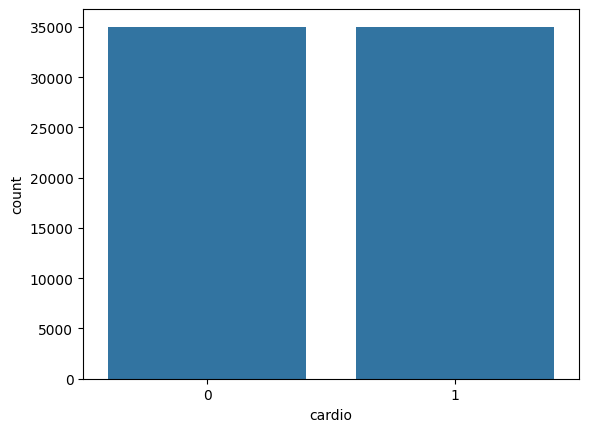

In [46]:
sns.countplot(x='cardio', data=df)

# visualize with respect to other column

<Axes: xlabel='gender', ylabel='count'>

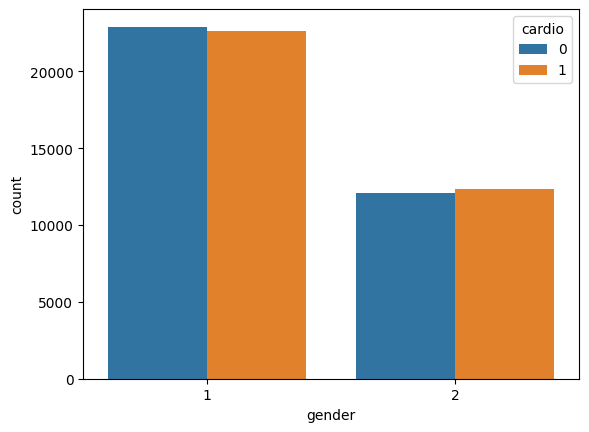

In [47]:
sns.countplot(x='gender', data=df, hue='cardio')

# Visualize through violin plot

<Axes: xlabel='cardio', ylabel='age'>

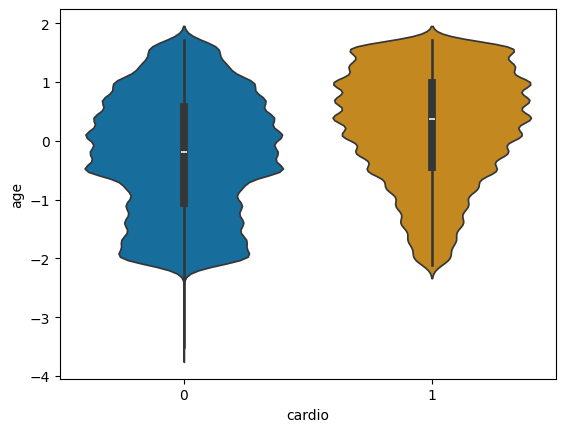

In [48]:
 sns.violinplot(x='cardio', y='age', data=df,palette='colorblind')

In [49]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


# separate Xand Y

In [50]:
X=df.drop('cardio', axis=1)
y=df['cardio']

In [51]:
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


# split the dataset

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
X_train.shape

(52500, 11)

In [54]:
X_test.shape

(17500, 11)

# Use RAndom Forest Classification

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# predict the model

In [36]:
y_pred=model.predict(X_test)

In [56]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [57]:
y_test

,cardio
46730,1
48393,1
41416,1
34506,1
43725,0
...,...
33226,0
23125,1
51551,0
54916,0


# check the score

In [58]:
model.score(X_test, y_test)

0.712

evaluation

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[6531, 2157],
       [2656, 6156]])

In [62]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      8688
           1       0.74      0.70      0.72      8812

    accuracy                           0.72     17500
   macro avg       0.73      0.73      0.72     17500
weighted avg       0.73      0.72      0.72     17500

